# Project Overview

One show that I really enjoyed watching was Psych. Psych is a detective-comedy show that ran from 2006 to 2014. As soon as I got to Season Three of my binge watch I started to get curious about the amount of murders depicted in the show. The show takes place in Santa Barbara, CA. I never recalled hearing or reading in the news that Santa Barbara was a hotbed of homicide. So, I tallied up every murder in the show and created my own dataset. I also derived a dataset showing the actual amount of murders in Santa Barbara from the annual Homicide in California report published by the California Department of Justice. This project is meant to compare fact to fiction.

# Importing Basic Libraries

In [1]:
#Here are the libraries I tend to use in my analysis. I tend to import all of them at once for simplicity.
#If I need more, then I will import them as needed. 

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
plt.style.use('fivethirtyeight')
%matplotlib inline

# Explorartory Analysis

In [2]:
#Here I am importing the Psych dataset I created

psych_data = pd.read_csv('Psych_Murders.csv')

In [3]:
#Here is a basic first look at the dataset

psych_data.head()

,Season,Episode,Murders,Notes,Corresponding Year
0,1,1,2,NaN,2006
1,1,2,1,NaN,2006
2,1,3,1,NaN,2006
3,1,4,0,NaN,2006
4,1,5,4,Alluded to two murders in previous months,2006


In [4]:
#There are 119 rows and 5 columns of data

psych_data.shape

(119, 5)

In [5]:
#Here we are checking the data types of each variable

psych_data.dtypes

Season                 int64
Episode                int64
Murders                int64
Notes                 object
Corresponding Year     int64
dtype: object

In [6]:
#Here we are checking to see if there are any missing variables
#I know I created the dataset myself, but it's always good to check anyway
#The Notes column has a lot of null values, but they aren't really null, they just didn't need any notes. 

psych_data.isna().sum()

Season                  0
Episode                 0
Murders                 0
Notes                 106
Corresponding Year      0
dtype: int64

In [7]:
#Here are some standard statistics from the dataset
#Looks like there are 1.11 murders per episode of Psych, with 4 being the most on a single episode
#My analysis will be mainly on the *yearly* murders depicted in Psych, not per episode

psych_data.describe()

,Season,Episode,Murders,Corresponding Year
count,119.000000,119.000000,119.000000,119.000000
mean,4.310924,8.067227,1.109244,2009.310924
std,2.196869,4.486762,0.989692,2.196869
min,1.000000,1.000000,0.000000,2006.000000
25%,2.000000,4.000000,0.000000,2007.000000
50%,4.000000,8.000000,1.000000,2009.000000
75%,6.000000,12.000000,2.000000,2011.000000
max,8.000000,16.000000,4.000000,2013.000000


In [8]:
#Here I am calibrating the dataset to sum the murders per episode into a yearly figure
#This way I can actually compare Psych to the real amount of homicides in Santa Barbara, CA

psych_year = psych_data.groupby('Corresponding Year').agg({'Murders':'sum'})

In [9]:
#Here's a quick look at the newly created dataset

psych_year.head()

,Murders
Corresponding Year,
2006,16
2007,16
2008,14
2009,15
2010,18


In [10]:
#I realized that I named the column "Murders" for both the Psych dataset, and the Santa Barbara dataset 
#So, I had to rename the Murders column in Psych so as to avoid any confusion

psych_year = psych_year.rename(columns={'Murders': 'Murders(Fictional)'})

[]

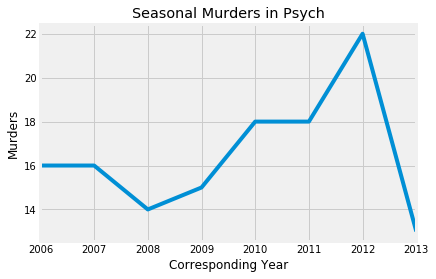

In [11]:
#Here I am plotting the murders portrayed in Psych each season
#The year roughly corresponds to the season, so 2006 = Season 1, etc. 

psych_year['Murders(Fictional)'].plot()

plt.title('Seasonal Murders in Psych')

plt.ylabel('Murders')

plt.plot()

In [12]:
#Here I am importing the Santa Barbara dataset that has the real yearly total of murders in that city

santabarbara = pd.read_csv('SantaBarbara_Murders.csv', index_col = "Year")

In [13]:
#Here is a brief look at the dataset

santabarbara.head()

,Murders
Year,
2006,13
2007,10
2008,14
2009,11
2010,11


In [14]:
#There are 9 rows and 1 column worth of data

santabarbara.shape

(9, 1)

In [15]:
#There are no missing values in the Santa Barbara dataset

santabarbara.isnull().sum()

Murders    0
dtype: int64

In [16]:
#Here are some basic descriptive statistics from the dataset
#It looks like there are 11 homicides per year in Santa Barbara from 2006-2014
#The most amount of murders during this time was 16, and the fewest was 6

santabarbara.describe()

,Murders
count,9.000000
mean,10.777778
std,3.345810
min,6.000000
25%,10.000000
50%,11.000000
75%,13.000000
max,16.000000


[]

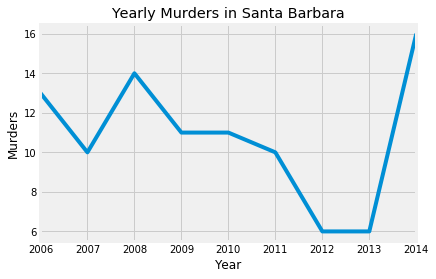

In [17]:
#Here I am plotting the actual recorded murders in Santa Barbara
#Looks like 2014 had a spike in murders after a relative lull from 2012-2013
#Note that I did not have 2014 in my data for Psych, only for Santa Barbara

santabarbara['Murders'].plot()

plt.title('Yearly Murders in Santa Barbara')

plt.ylabel('Murders')

plt.plot()

In [18]:
#Here I am combining the datasets of Psych and Santa Barbara so I can do an easier joint analysis

total_murders = pd.concat([psych_year, santabarbara], axis=1, join='inner')

In [19]:
#Here is a brief look at the new dataset

total_murders.head()

,Murders(Fictional),Murders
2006,16,13
2007,16,10
2008,14,14
2009,15,11
2010,18,11


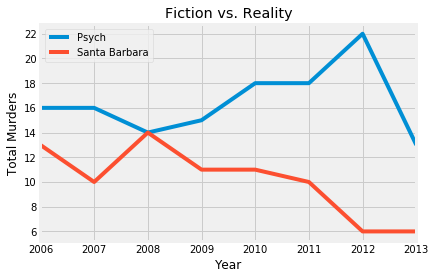

In [20]:
#Plotting both murders side by side

total_murders.plot()

plt.title("Fiction vs. Reality")
plt.xlabel("Year")
plt.ylabel("Total Murders")

plt.legend(['Psych', 'Santa Barbara'])
plt.show()

#### Comments

1. It looks like 2008 was the only time in which the show Psych matched the actual amount of murders in Santa Barbara
2. Execept for 2008, Psych had more murders shown than actually occurred in Santa Barbara
3. Ironically, the year in which the most murders were shown on Psych, the actual amount of homicies in Santa Barbara
    was the lowest (2012)

# Increase Murders to Increase Ratings?

After analyzing the difference between the murders portrayed on Psych and the actual murders in Santa Barbara, I wanted to see if there was a reason that Psych had so many more murders than real life. I know it's a t.v. show and therefore many elements are going to be glamorized or embellished, but my hypothesis was that perhaps more murders led to higher ratings for the show. I gathered the average viewership for each season and once again created my own dataset.

In [21]:
#Here I am uploading the dataset documenting Psych viewership throughout their run on TV

psych_ratings = pd.read_csv('Psych_Ratings.csv', index_col = "Year")

In [22]:
#Here is a brief look at the dataset

psych_ratings.head()

,Average Ratings,Season,Notes
Year,,,
2006,4.34,1,Highest rated episode was episode 1 at 6 milli...
2007,3.92,2,NaN
2008,4.13,3,NaN
2009,3.61,4,NaN
2010,3.30,5,NaN


In [23]:
#The only null values are in the Notes column, which isn't relevant to the analysis

psych_ratings.isna().sum()

Average Ratings    0
Season             0
Notes              7
dtype: int64

[]

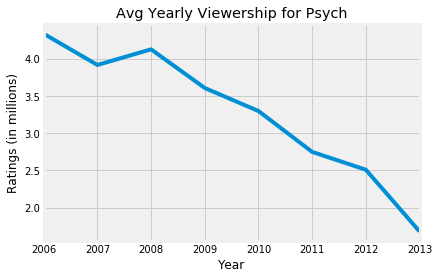

In [24]:
#Here I am plotting the viewership of Psych over time
#It looks like the show had a steady decline in ratings 


psych_ratings['Average Ratings'].plot()

plt.title('Avg Yearly Viewership for Psych')

plt.ylabel('Ratings (in millions)')

plt.plot()

In [25]:
#Here I am combining the Psych murder dataset with the Psych ratings dataset

total_psych = pd.concat([psych_year, psych_ratings], axis=1, join='inner').drop(['Season', 'Notes'], axis=1)

In [26]:
#Here is a brief look at the combined dataset

total_psych.head()

,Murders(Fictional),Average Ratings
2006,16,4.34
2007,16,3.92
2008,14,4.13
2009,15,3.61
2010,18,3.30


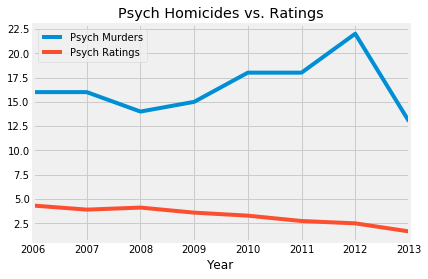

In [27]:
#Here is the plot of the viewership vs. the murders 

total_psych.plot()

plt.title("Psych Homicides vs. Ratings")
plt.xlabel("Year")


plt.legend(['Psych Murders', 'Psych Ratings'])
plt.show()

This chart doesn't seem so clean. I think what might be best is to scale and standardize the data so comparing the relationship between Psych's ratings and the murders on the show are more interpretable.

In [28]:
#Here I am importing the Standard Scaler library and scaling the total_psych dataset

from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()

psych_scaled = sc_X.fit_transform(total_psych)

C:\Users\kalstedh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\kalstedh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [29]:
#Here is the reformed total_psych dataset

psych_scaled

array([[-0.18898224,  1.24503567],
       [-0.18898224,  0.75171965],
       [-0.94491118,  0.99837766],
       [-0.56694671,  0.38760544],
       [ 0.56694671,  0.02349124],
       [ 0.56694671, -0.62251783],
       [ 2.0788046 , -0.9044127 ],
       [-1.32287566, -1.87929912]])

In [30]:
#Here I am converting the numpy array of psych_scaled back into a dataframe 

psych_scaled = pd.DataFrame(psych_scaled, columns=['Murders Scaled', 'Ratings Scaled']) 

print(psych_scaled)

   Murders Scaled  Ratings Scaled
0       -0.188982        1.245036
1       -0.188982        0.751720
2       -0.944911        0.998378
3       -0.566947        0.387605
4        0.566947        0.023491
5        0.566947       -0.622518
6        2.078805       -0.904413
7       -1.322876       -1.879299


In [31]:
#Here I am creating a dataframe for years so I can add it to the psych_scaled dataframe

year = pd.DataFrame({'Year':[2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013]}) 

In [32]:
#Checking if I created the dataframe correctly

year.head()

,Year
0,2006
1,2007
2,2008
3,2009
4,2010


In [33]:
#Here I am officially adding the year dataframe to the psych_scaled dataframe

psych_scaled = pd.concat([year, psych_scaled], axis=1, join='inner')

In [34]:
#Checking to see if everything came together correctly

psych_scaled.head()

,Year,Murders Scaled,Ratings Scaled
0,2006,-0.188982,1.245036
1,2007,-0.188982,0.751720
2,2008,-0.944911,0.998378
3,2009,-0.566947,0.387605
4,2010,0.566947,0.023491


In [35]:
#Here I am setting the column "Year" as the index to make it easier for plotting

psych_scaled = psych_scaled.set_index("Year")

In [36]:
psych_scaled.head()

,Murders Scaled,Ratings Scaled
Year,,
2006,-0.188982,1.245036
2007,-0.188982,0.751720
2008,-0.944911,0.998378
2009,-0.566947,0.387605
2010,0.566947,0.023491


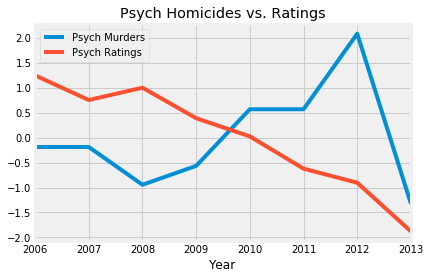

In [37]:
#Here I am plotting the scaled data
#It looks cleaner and more interpretable than before
#However, I still do not see any sort of relationship going on, maybe a negative one

psych_scaled.plot()

plt.title("Psych Homicides vs. Ratings")
plt.xlabel("Year")


plt.legend(['Psych Murders', 'Psych Ratings'])
plt.show()

#### Checking for actual correlation

Just to pique my curiosity, I am going to test if there is any kind of correlation between the number of homicides on Psych and the viewership of Psych. No feature scaling is needed so I will be using the non-scaled total_psych dataset

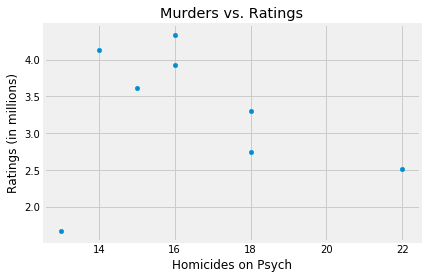

In [38]:
#Here I am plotting the relationship between murders on Psych and the ratings of Psych
#At first glance there does seem to be a clear negative relationship between murders and ratings

ax = total_psych.plot(kind='scatter', x='Murders(Fictional)', y='Average Ratings')

plt.ylabel("Ratings (in millions)")

plt.xlabel("Homicides on Psych")

plt.title("Murders vs. Ratings");

In [39]:
#And here is the actual correlation between the variables
#Looks like there is a slight negative relationship between the murders shown and the ratings of the show
#Of course, correlation is not causation so we should investigate further

total_psych.corr()

,Murders(Fictional),Average Ratings
Murders(Fictional),1.000000,-0.159264
Average Ratings,-0.159264,1.000000


# Creating a Basic Regression Model

In order to truly find any kind of causal relationship, we need to build a model. Below I will use simple linear regression to test the relationship between homicides on Psych and the viewship of Psych. Since we have both the features (murders) and target (ratings) this will be a supervised learning project. 

In [40]:
#Here I am separating X and y values 

X = total_psych.iloc[:,:-1].values
y = total_psych.iloc[:,1].values

In [41]:
#Here I am verifying my X variables

print(X)

[[16]
 [16]
 [14]
 [15]
 [18]
 [18]
 [22]
 [13]]


In [42]:
#Here I am verifying my y variables

print(y)

[4.34 3.92 4.13 3.61 3.3  2.75 2.51 1.68]


In [43]:
#Here I am splitting the dataset into training and test sets
#As you can see, "test size" of .3 means 30% of the data will be used for the test set and 70% for the training set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=0)

In [44]:
#Here I setting up my linear regression model

from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

#Here we are fitting the linear regression model to our training set
#We will be using the fit method from the LinearRegression class
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

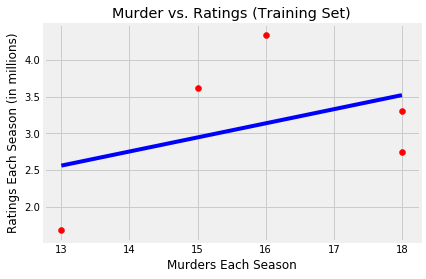

In [45]:
#Here we are plotting our real data, using the training set
#We want to plot the points, then plot the regression line that runs through
#We want to compare the actual data on the training set, to the predicted values derived from the training set

plt.scatter(X_train, y_train, color = "red")

plt.plot(X_train, regressor.predict(X_train), color = "blue")

#Here we are just simply labeling our graph
plt.title("Murder vs. Ratings (Training Set)")
plt.xlabel("Murders Each Season")
plt.ylabel("Ratings Each Season (in millions)")
plt.show()

The line does not look like it has much of any predictive capabilty

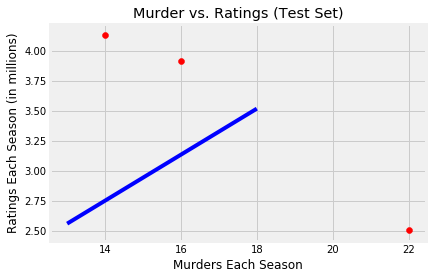

In [46]:
#Here we are plotting our real data, using the test set
#We want to plot the points, then plot the regression line that runs through
#We want to compare the actual data on the test set, to the predicted values derived from the training set (yes, still training set)

plt.scatter(X_test, y_test, color = "red")

plt.plot(X_train, regressor.predict(X_train), color = "blue")

#Here we are just simply labeling our graph
plt.title("Murder vs. Ratings (Test Set)")
plt.xlabel("Murders Each Season")
plt.ylabel("Ratings Each Season (in millions)")
plt.show()

Once again this looks horrible. 

In [47]:
#Here I am printing the R-Squared values for the training and test sets
#Both scores are miserable. The model has basically zero explantory power

print(regressor.score(X_train, y_train))
print(regressor.score(X_test, y_test))

0.16655667838755495
-2.6502249137425005


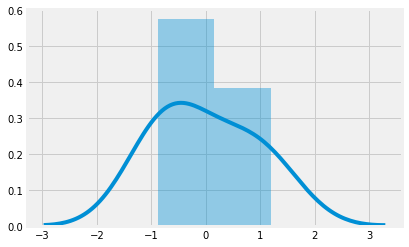

In [48]:
#Here I am just double checking if the errors are normally distributed (homoskedastic vs. heteroskedastic)
#The residuals look normally distributed with a slight right skew

sns.distplot(y_train - regressor.predict(X_train))

#### Further Comments

1. Both the data and the residuals are normally distributed, so there really is no need for log transformation
2. Though I doubt there is truly any relationship between the murders on Psych and the ratings for Psych, the lack of data
    (N is only 8 when ideally you want at least 30) will always hinder the model building

In [49]:
#Once again I doubt there is truly any significant relationship between the murders portrayed on Psych and Psych's ratings
#However, just to be thorough I am going to check the statistical significance of the independent variable (murders)
#In order to check the statistical significance, I am going to import the statsmodel library

import statsmodels.api as sm

In [50]:
#Essentially we need a B0X0
#The stats model library is useful, but does not contain the constant column, hence why we add it

#This is specifically a column of 8 "ones" since the constant will just multiply by one to keep its value
#The append function helps us add a new column to our dataset
X = np.append(arr =  np.ones((8,1)).astype(int), values = X, axis = 1)

In [51]:
#Checking if X came out correct
#We now have a Beta Constant and a Beta One to plug into our model

X

array([[ 1, 16],
       [ 1, 16],
       [ 1, 14],
       [ 1, 15],
       [ 1, 18],
       [ 1, 18],
       [ 1, 22],
       [ 1, 13]], dtype=int64)

In [52]:
#The stats model has an OLS method that gives us a nice statistical summary of our model

regressor_OLS = sm.OLS(endog = y, exog = X).fit()

In [53]:
#Here we are checking the p-values of our various X variables
#Our indepedent variable has a p-value of .7, way higher than standard significance of .05
#As suspected, there is no statistical significance to the murders on Psych as it pertains to Psych's ratings

regressor_OLS.summary()

C:\Users\kalstedh\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                 -0.137
Method:                 Least Squares   F-statistic:                    0.1562
Date:                Fri, 19 Jun 2020   Prob (F-statistic):              0.706
Time:                        16:50:08   Log-Likelihood:                -9.9616
No. Observations:                   8   AIC:                             23.92
Df Residuals:                       6   BIC:                             24.08
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.1256      2.167      1.904      0.106      -1.178       9.429
x1            -0.0513      0.130     -0.395      0.706      -0.369       0.266
==============================================================================
Omnibus:                        2.966   Durbin-Watson:                   0.425
Prob(Omnibus):                  0.227   Jarque-Bera (JB):                1.000
Skew:                          -0.865   Prob(JB):                        0.606
Kurtosis:                       2.927   Cond. No.                         106.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""